In [72]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import tensorflow as tf 
from keras import layers, models, optimizers, losses, ops
import tensorflow as tf
import numpy as np
import pandas as pd 
import re


In [3]:
image_size = (244,244)
input_shape = (244,244,3)
batch_size = 64

train_speed, val_speed = tf.keras.preprocessing.image_dataset_from_directory('data/speed/', 
                                                                    labels = 'inferred', 
                                                                    label_mode = 'categorical',
                                                                    batch_size = batch_size,
                                                                    image_size = image_size,
                                                                    validation_split = 0.2,
                                                                    subset ='both', 
                                                                    seed = 42)


Found 6780 files belonging to 2 classes.
Using 5424 files for training.
Using 1356 files for validation.


In [4]:
augmentation_layers = tf.keras.Sequential([
        tf.keras.layers.RandomZoom(0.3),
        tf.keras.layers.RandomTranslation(height_factor=(0, 0.05), width_factor=(0.025, 0.025)),
        tf.keras.layers.RandomBrightness(factor=(-0.3, 0.3), value_range=(0, 225)),
        tf.keras.layers.RandomSharpness(factor=(0.3,0.7), value_range=(0,225)),
        tf.keras.layers.RandomSaturation(factor=(0.35,0.65), value_range=(0,225)),
        tf.keras.layers.RandomContrast(factor=(0.0,0.2), value_range=(0,225))
])

2025-03-25 18:38:41.860312: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


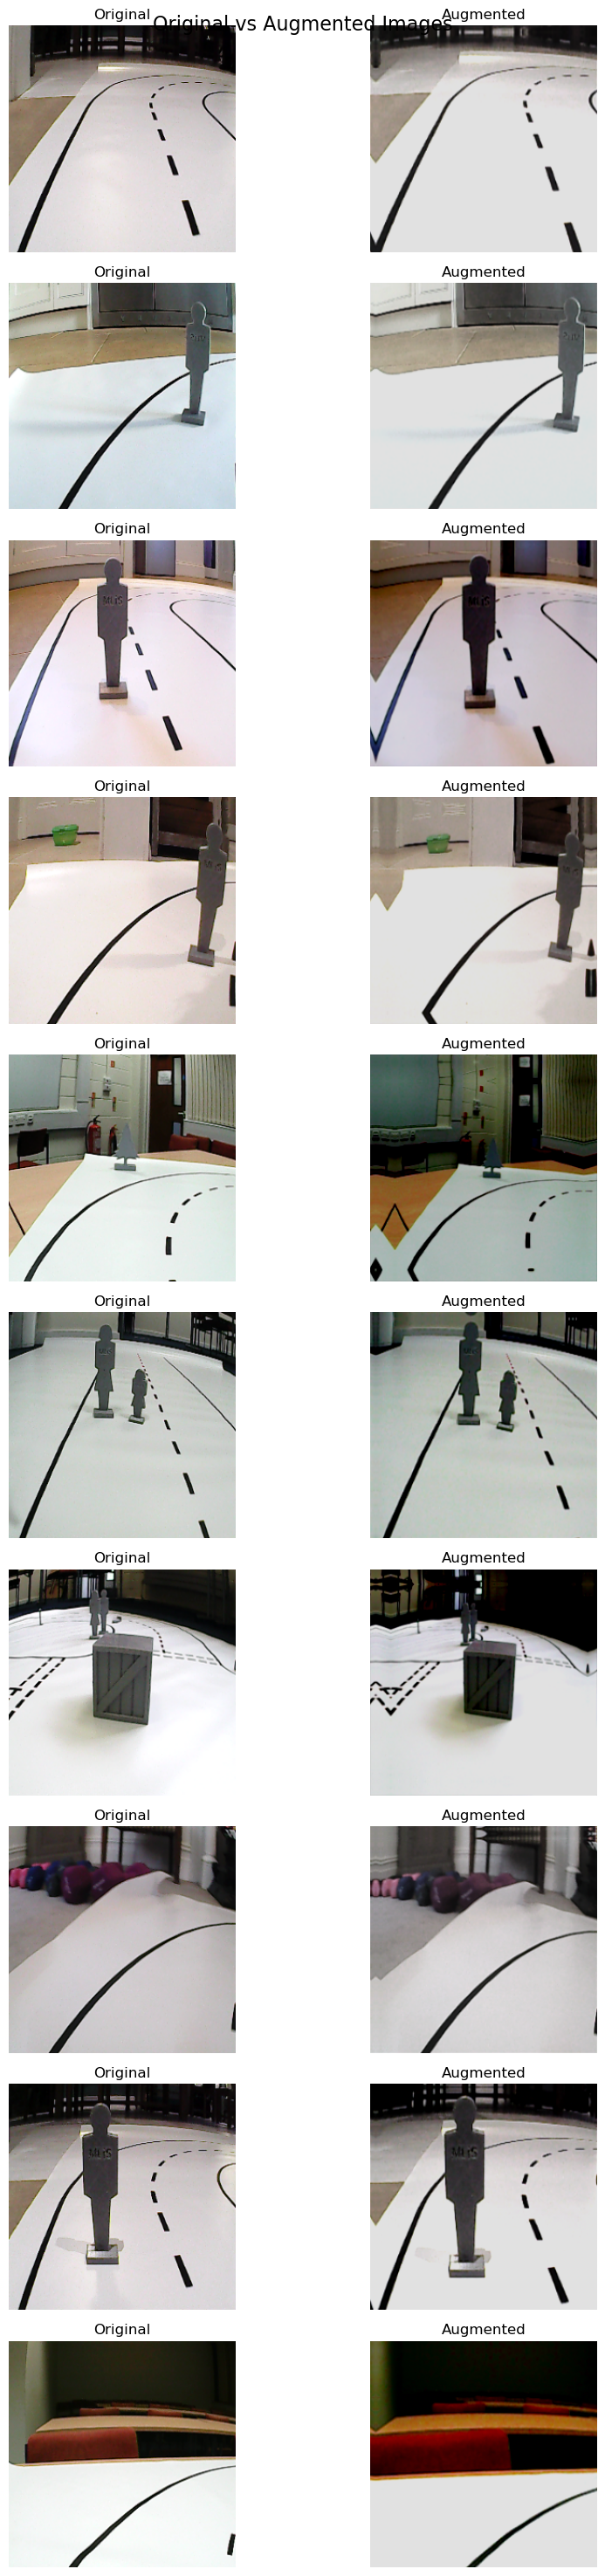

In [71]:
 #! Claude Generated. 
def visualize_augmentations(dataset, augmentation_layer, num_samples=10):
    """
    Visualize the effects of data augmentation on images.
    
    Parameters:
    - dataset: TensorFlow image dataset
    - augmentation_layer: Sequential augmentation layers
    - num_samples: Number of images to visualize
    """
    # Prepare the figure
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 3*num_samples))
    fig.suptitle('Original vs Augmented Images', fontsize=16)
    
    # Take a batch of images
    for images, labels in dataset.take(1):
        # Randomly select indices to display
        display_indices = np.random.choice(images.shape[0], num_samples, replace=False)
        
        for i, idx in enumerate(display_indices):
            # Original image
            original_image = images[idx].numpy()
            axes[i, 0].imshow(original_image.astype('uint8'))
            axes[i, 0].set_title('Original')
            axes[i, 0].axis('off')
            
            # Apply augmentation
            # TensorFlow expects a batch of images, so we need to add a batch dimension
            augmented_image = augmentation_layer(tf.expand_dims(images[idx], 0))[0]
            
            # Convert to numpy and display
            augmented_image = augmented_image.numpy()
            axes[i, 1].imshow(augmented_image.astype('uint8'))
            axes[i, 1].set_title('Augmented')
            axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize augmentations
visualize_augmentations(train_speed, augmentation_layers)